# <h1  align='center'>Houses Sale Price Prediction</h1>

## 1 Import libraries

In [180]:
# Essential libraries
import pandas as pd
import numpy as np
import os

# visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Regression  models
import scipy.stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.svm as svm
from sklearn.tree import DecisionTreeRegressor

# evaluation metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# preprocessing and data resampling
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Display options
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Models savings
from joblib import dump, load
import json 

# 2 Import the Datasets

In [181]:
# Read CSV files 
os.chdir(r'C:\Users\KHALID\vs code\data science projects\Houses Sale Price Prediction')
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("train.csv")
# combine the data 
data = pd.concat([train_data,test_data],axis=0)

# 3 Exploratory Data Analysis

## 3.1 Data cleaning

In [182]:
# Show the first 5 rows 
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
# Show summary statstics 
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2920.000000,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2758.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.537785,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,161.291638,441.791261,438.630172,386.521513,436.453656,48.614752,525.390365,0.518822,0.238712,0.550821,0.502799,0.815638,0.220300,1.625115,0.644556,24.685247,0.747187,213.768215,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79428.893889
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [184]:
# Show variables types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallC

In [185]:
# Data shape
data.shape

(2920, 81)

In [186]:
# Columns names 
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [187]:
# Columns with object data type
data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [188]:
# Unique values for object variable data type
def print_unique_col_values(data):
       for column in data:
            if data[column].dtypes=='object':
                print(f'{column}: {data[column].unique()}') 
print(print_unique_col_values(data))                

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

In [189]:
# Change object Data types to categorical
data[list(data.select_dtypes(include=['object']))]= data.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))

In [190]:
# Display all rows to see the variable types  
with pd.option_context('display.max_rows', None):
  print(data.dtypes)

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF 

In [191]:
# Counting null percentage of null values to drop columns with high rates of null values
Total = data.isnull().sum().sort_values(ascending=False)
Percent = Total/data.isnull().count().sort_values(ascending=False)
data_percent = pd.concat([Total,Percent],axis=1,keys=['Total', 'Percent'])
data_percent.head(30)

,Total,Percent
PoolQC,2906,0.995205
MiscFeature,2812,0.963014
Alley,2738,0.937671
Fence,2358,0.807534
FireplaceQu,1380,0.472603
LotFrontage,518,0.177397
GarageYrBlt,162,0.055479
GarageCond,162,0.055479
GarageType,162,0.055479
GarageFinish,162,0.055479


In [192]:
# Handeling None values
all_data2=data.drop((data_percent[data_percent['Percent'] > 0.15]).index,axis=1)
all_data2.dropna(subset=['GarageQual', 'GarageFinish', 'GarageCond', 'GarageYrBlt','BsmtFinType1','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType2'],inplace=True)
all_data2.isnull().sum().sort_values(ascending=False)
all_data2['MasVnrType'].fillna('None',inplace=True)
all_data2['MasVnrArea'].fillna(0,inplace=True)
all_data2.dropna(inplace=True,axis=0)
all_data2[['MasVnrType','MasVnrArea','Electrical']].isnull().sum()

MasVnrType    0
MasVnrArea    0
Electrical    0
dtype: int64

In [193]:
# Show  all columns 
pd.set_option("display.max_columns", None)
all_data2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


## 3.2 Data Visualization

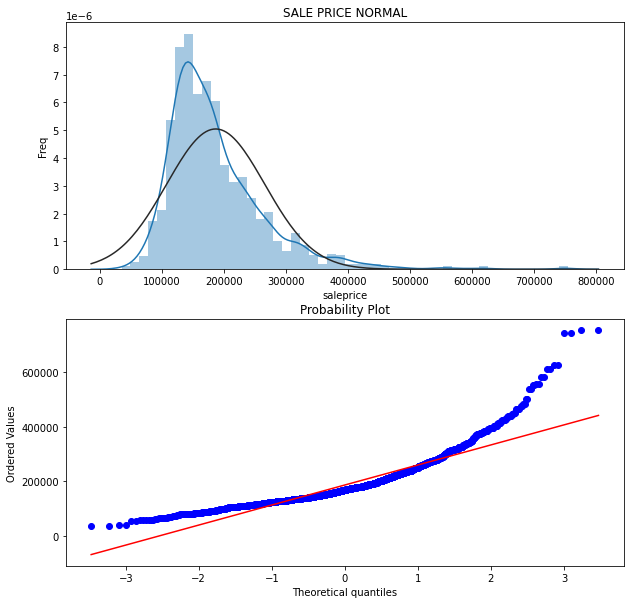

In [194]:
# Plot SalePrice distribution graph
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax = ax.flatten()
scipy.stats.probplot(all_data2['SalePrice'],plot=ax[1])
sns.distplot(all_data2['SalePrice'],fit=norm, ax =ax[0])
ax[0].set_xlabel('saleprice')
ax[0].set_ylabel('Freq')
ax[0].set_title("SALE PRICE NORMAL")
plt.show()

In [195]:
# Normalize data using box cox transformation
all_data2['SalePrice'], e =scipy.stats.boxcox(all_data2['SalePrice'])

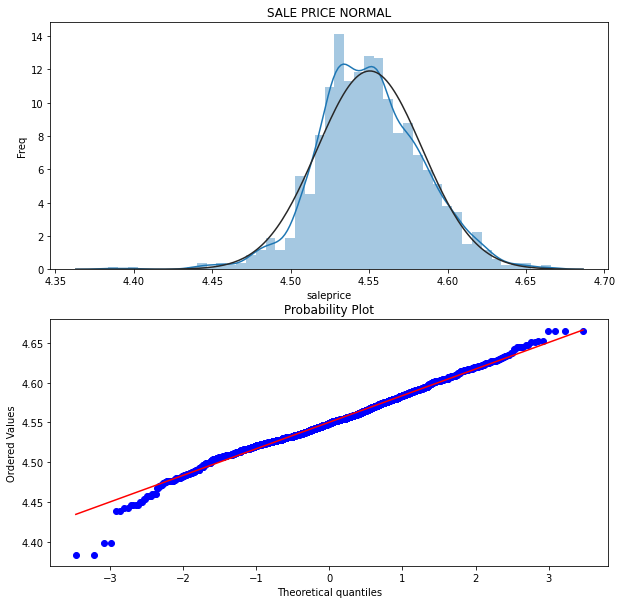

In [196]:
# Plot SalePrice distribution graph
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax = ax.flatten()
scipy.stats.probplot(all_data2['SalePrice'],plot=ax[1])
sns.distplot(all_data2['SalePrice'],fit=norm, ax =ax[0])
ax[0].set_xlabel('saleprice')
ax[0].set_ylabel('Freq')
ax[0].set_title("SALE PRICE NORMAL")
plt.show()

In [197]:
# Check Skewness and Kurtosis
print("Skewness: ",  all_data2['SalePrice'].skew())
print("Kurtosis: ",  all_data2['SalePrice'].kurt())

Skewness:  -0.02036190607243722
Kurtosis:  0.9115491201146733


In [198]:
# Remove outliers using Standard Deviations by removing all data out 3 times standard deviation larger or smaller from the mean 
SalePrice_mean, SalePrice_std = all_data2['SalePrice'].mean(), all_data2['SalePrice'].std()
cut_off = SalePrice_std * 3
lower, upper = SalePrice_mean - cut_off, SalePrice_mean + cut_off
all_data2.drop(all_data2[(all_data2.SalePrice < lower) ].index,inplace=True)
all_data2.drop(all_data2[(all_data2.SalePrice > upper) ].index,inplace=True)


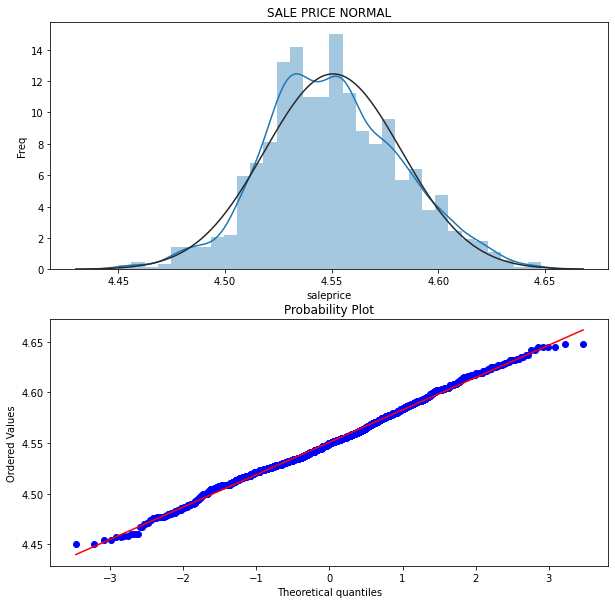

In [199]:
# Plot the Sale Price distribution 
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax = ax.flatten()
scipy.stats.probplot(all_data2['SalePrice'],plot=ax[1])
sns.distplot(all_data2['SalePrice'],fit=norm, ax =ax[0])
ax[0].set_xlabel('saleprice')
ax[0].set_ylabel('Freq')
ax[0].set_title("SALE PRICE NORMAL")
plt.show()

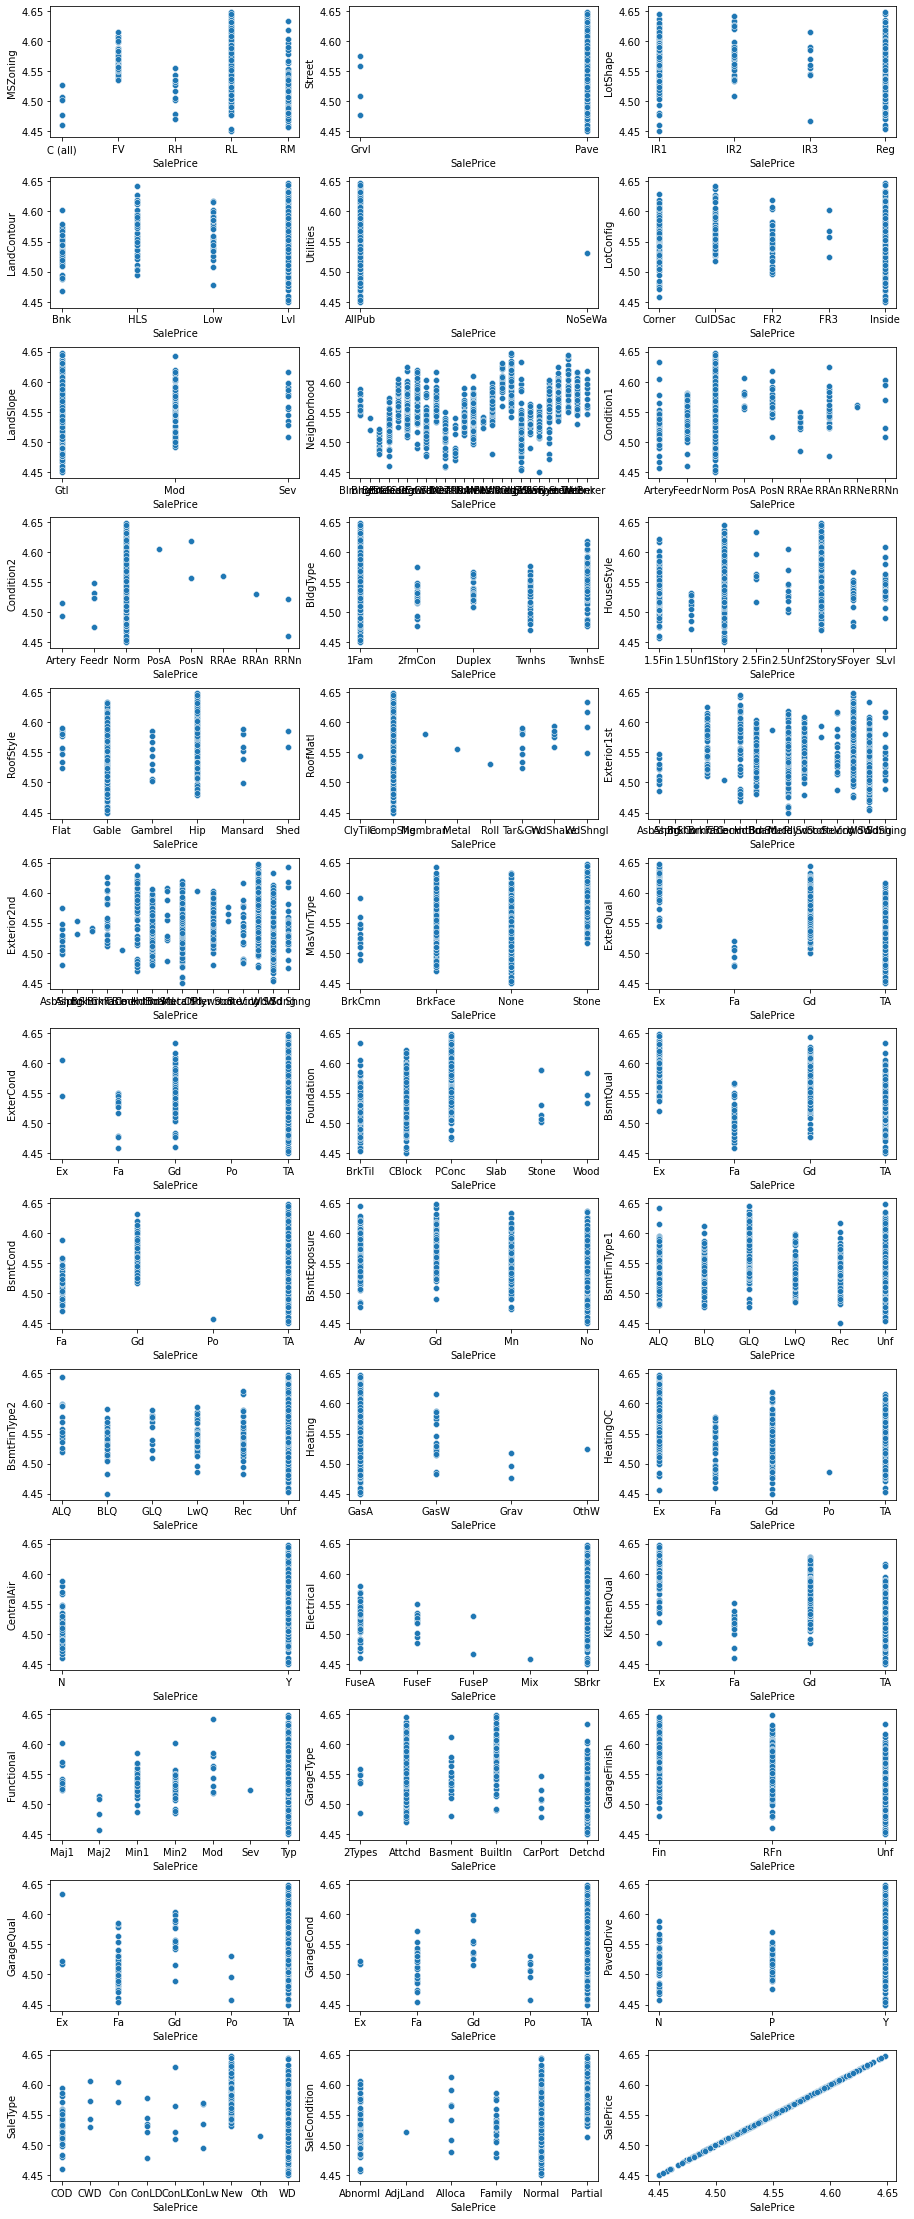

In [200]:
# plot scatter diagram between independent categorical variable and the depended variable 'Sale Price'
categories = list(all_data2.select_dtypes(include= 'category').columns)
categorical = all_data2[categories]
sales = all_data2['SalePrice']
categorical1 =pd.concat([categorical,sales],axis=1) 
categorical1

fig, axs = plt.subplots(13, 3, figsize=(10, 40))
axs = axs.flatten()
plt.subplots_adjust(right=1.3,hspace=0.3)
for i, col in enumerate(list(categorical1)):
    sns.scatterplot(y='SalePrice', x=col, ax=axs[i], data=categorical1)
    axs[i].set_xlabel('SalePrice')
    axs[i].set_ylabel(col)
plt.show()

In [201]:
# Encoding categorical variables
categorical1 = categorical1.drop('SalePrice',axis=1)
encoder = LabelEncoder()
encoded_cat = categorical1.apply(lambda x: encoder.fit_transform(x))
encoded_cat = pd.concat([encoded_cat,sales],axis=1)

In [202]:
# Categorical variable with pearson coef larger than 0.5
cor = encoded_cat.corr()
lcor = abs(cor.iloc[0:(len(cor.index)-1),len(cor.columns)-1]).sort_values(ascending=False )
lcor[(lcor>0.5)]

ExterQual       0.616859
KitchenQual     0.584905
BsmtQual        0.565820
GarageFinish    0.550228
Foundation      0.501336
Name: SalePrice, dtype: float64

In [203]:
# Drop categorical variables with correlation less than 0.5
lcor= list(lcor[(lcor>0.5)].reset_index()['index'])
encoded_cat = encoded_cat[lcor]
encoded_cat

,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation
0,2,2,2,1,2
1,3,3,2,1,1
2,2,2,2,1,2
3,3,2,3,2,0
4,2,2,2,1,2
...,...,...,...,...,...
1455,3,3,2,1,2
1456,3,3,2,2,1
1457,0,2,3,1,3
1458,3,2,3,2,1


In [204]:
# sort numeric variable based on correlation to the dependent variable
numeric_data = all_data2.select_dtypes(exclude= 'category').drop(['Id'],axis=1)
numeric_data

corrnum = numeric_data.corr()
lnum = abs(corrnum.iloc[0:(len(corrnum.index)-1),len(corrnum.columns)-1]).sort_values(ascending=False )
lnum.head(10)

OverallQual     0.797373
GrLivArea       0.689374
GarageCars      0.656678
GarageArea      0.605952
FullBath        0.603547
1stFlrSF        0.582770
YearBuilt       0.580662
TotalBsmtSF     0.571821
YearRemodAdd    0.568323
GarageYrBlt     0.538347
Name: SalePrice, dtype: float64

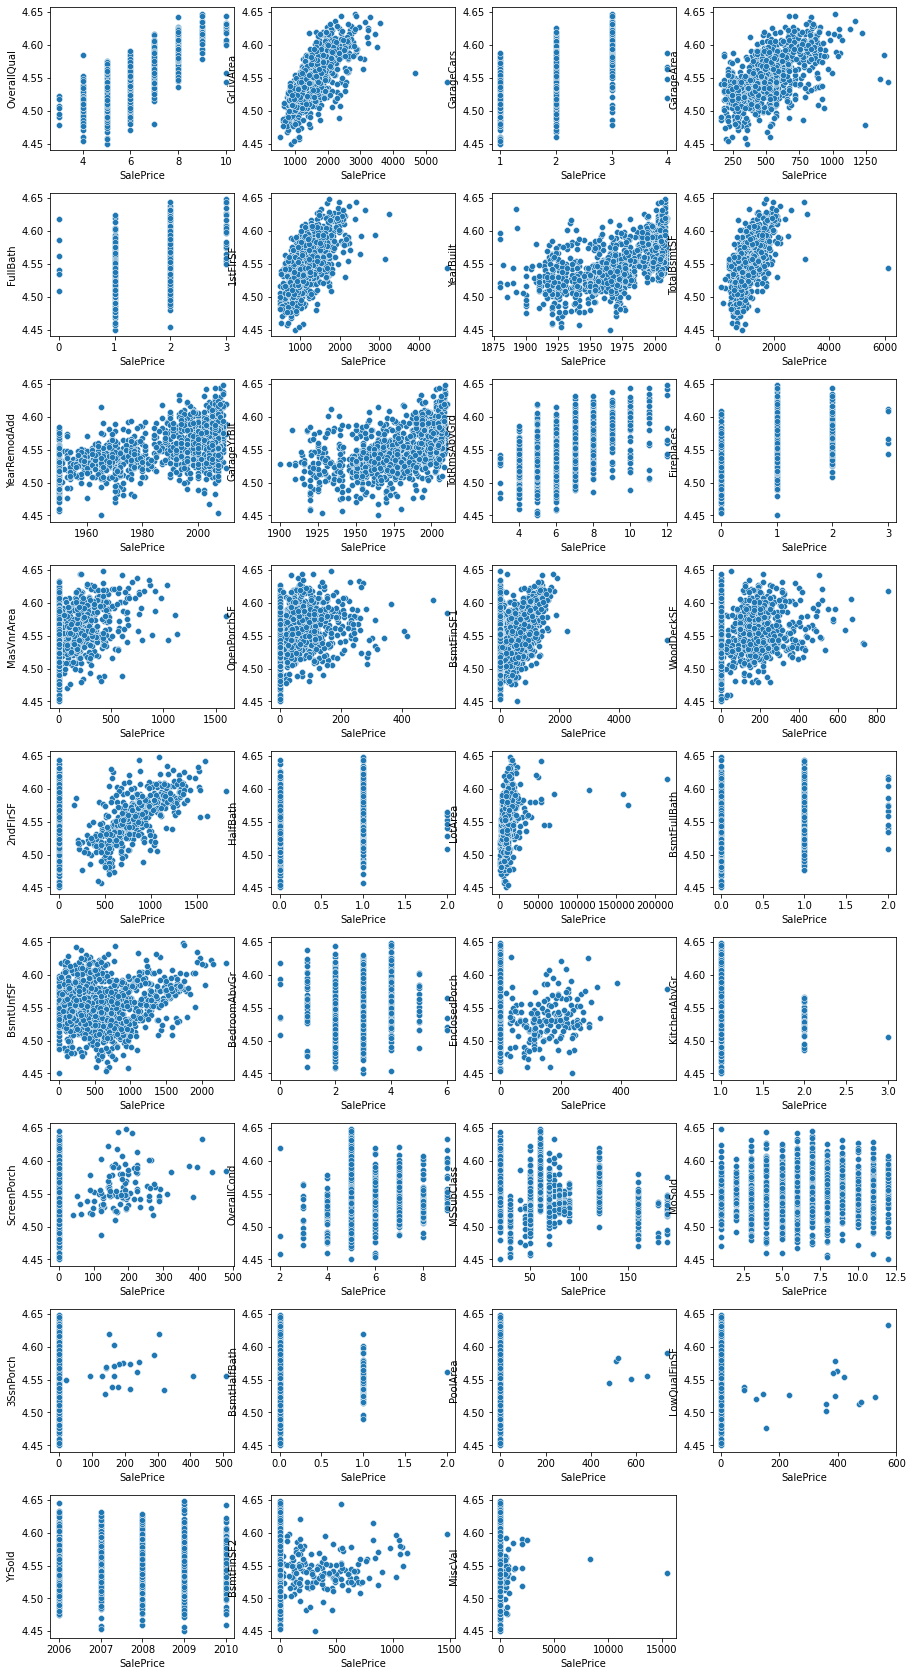

In [205]:
# Plot scatter diagram between independent numerical variable and the depended variable
fig, axs = plt.subplots(9, 4, figsize=(10, 30))
axs = axs.flatten()
plt.subplots_adjust(right=1.3,hspace=0.3)
for i, col in enumerate(list(lnum.index)):
    sns.scatterplot(y='SalePrice', x=col, ax=axs[i], data=numeric_data)
    axs[i].set_xlabel('SalePrice')
    axs[i].set_ylabel(col)
fig.delaxes(axs[35])    
plt.show()

# 4 Feature Engineering 

In [206]:
# Combine  data where possible 
 # Age of building   
numeric_data['Age']= numeric_data['YrSold'] - numeric_data['YearBuilt']
 # Home  quality 
numeric_data['home_quality'] = numeric_data['OverallQual'] + numeric_data['OverallCond']
  # Total area 
numeric_data['Area'] = (numeric_data['BsmtFinSF1'] + numeric_data['BsmtFinSF2'] +
                         numeric_data['1stFlrSF'] + numeric_data['2ndFlrSF'])
numeric_data['NumBath'] = (numeric_data['FullBath'] + (0.5 * numeric_data['HalfBath']) +
                            numeric_data['BsmtFullBath'] + (0.5 * numeric_data['BsmtHalfBath']))
numeric_data['porch_area'] = (numeric_data['OpenPorchSF'] + numeric_data['3SsnPorch'] +
                              numeric_data['EnclosedPorch'] + numeric_data['ScreenPorch'] +
                              numeric_data['WoodDeckSF'])
 # Create variables from weak correlated variable to avoid droping it and losing data 
numeric_data['haspool'] = numeric_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
numeric_data['hasfireplace'] = numeric_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#credit goes to 'https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition'

In [207]:
# Drop variable that: 1- feature created from them to avoid presence of multicollinearity 
#                     2-  Has small value of  pearson coef 

numeric_data.drop(['GarageArea','TotalBsmtSF','YearBuilt','OpenPorchSF','LotArea','MasVnrArea','MSSubClass','LowQualFinSF','WoodDeckSF','EnclosedPorch','3SsnPorch','PoolArea','Fireplaces','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OverallQual','OverallCond','YrSold','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','ScreenPorch','MiscVal'],axis=1, inplace=True)
numeric_data

,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,MoSold,SalePrice,Age,home_quality,Area,NumBath,porch_area,haspool,hasfireplace
0,2003,856,854,1710,3,1,8,2003.0,2,2,4.567755,5,12,2416,3.5,61,0,0
1,1976,1262,0,1262,3,1,6,1976.0,2,5,4.555619,31,14,2240,2.5,298,0,1
2,2002,920,866,1786,3,1,6,2001.0,2,9,4.573709,7,12,2272,3.5,42,0,1
3,1970,961,756,1717,3,1,7,1998.0,3,2,4.531976,91,12,1933,2.0,307,0,1
4,2000,1145,1053,2198,4,1,9,2000.0,3,12,4.583139,8,13,2853,3.5,276,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2000,953,694,1647,3,1,7,1999.0,2,8,4.552371,8,11,1647,2.5,40,0,1
1456,1988,2073,0,2073,3,1,7,1978.0,2,2,4.568373,32,12,3026,3.0,349,0,1
1457,2006,1188,1152,2340,4,1,9,1941.0,1,5,4.588424,69,16,2615,2.0,60,0,1
1458,1996,1078,0,1078,2,1,5,1950.0,1,4,4.533382,60,11,2156,2.0,478,0,0


In [208]:
# Standardize data using MinMax scaler 
scaler = MinMaxScaler()
numeric_data[['porch_area','Area','GrLivArea','2ndFlrSF','1stFlrSF','YearRemodAdd','GarageYrBlt']] = scaler.fit_transform(numeric_data[['porch_area','Area','GrLivArea','2ndFlrSF','1stFlrSF','YearRemodAdd','GarageYrBlt']])
numeric_data

,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,MoSold,SalePrice,Age,home_quality,Area,NumBath,porch_area,haspool,hasfireplace
0,0.883333,0.088620,0.469747,0.232331,3,1,8,0.936364,2,2,4.567755,5,12,0.176110,3.5,0.059396,0,0
1,0.433333,0.185080,0.000000,0.144865,3,1,6,0.690909,2,5,4.555619,31,14,0.159762,2.5,0.290166,0,1
2,0.866667,0.103825,0.476348,0.247169,3,1,6,0.918182,2,9,4.573709,7,12,0.162735,3.5,0.040896,0,1
3,0.333333,0.113566,0.415842,0.233698,3,1,7,0.890909,3,2,4.531976,91,12,0.131247,2.0,0.298929,0,1
4,0.833333,0.157282,0.579208,0.327606,4,1,9,0.909091,3,12,4.583139,8,13,0.216701,3.5,0.268744,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.833333,0.111665,0.381738,0.220031,3,1,7,0.900000,2,8,4.552371,8,11,0.104681,2.5,0.038948,0,1
1456,0.633333,0.377762,0.000000,0.303202,3,1,7,0.709091,2,2,4.568373,32,12,0.232770,3.0,0.339825,0,1
1457,0.933333,0.167498,0.633663,0.355330,4,1,9,0.372727,1,5,4.588424,69,16,0.194594,2.0,0.058423,0,1
1458,0.766667,0.141364,0.000000,0.108942,2,1,5,0.454545,1,4,4.533382,60,11,0.151960,2.0,0.465433,0,0


In [209]:
# Combine the data and split the dependent variable from the independent one
Final_data = pd.concat([numeric_data,encoded_cat],axis=1)
x = Final_data.drop('SalePrice',axis=1)
y = Final_data['SalePrice']
x.shape

(2672, 22)

# 5. Build the model

## 5.1 Select evaluation metrics 

In [210]:
# random state
np.random.seed(7)

# split the data into training and testing splits 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

# numbers of splits is 5 
kf = KFold(n_splits=5)

# Model evaluation Metrics 
 # Root mean square error
def rmse(y, y_pred):
    return print('RMSE:',mean_squared_error(y, y_pred,squared= False))
# socres dictionary
scores={}

## 5.2  Models development 

In [211]:
# linear regression
mse_score = make_scorer(mean_squared_error)
model= LinearRegression(fit_intercept=True,)
parmas={'normalize':('True', 'False')}
md= GridSearchCV(model,parmas,cv=kf,scoring= mse_score)
fitted_model= md.fit(x_train,y_train)
print('best Score:',np.sqrt(fitted_model.best_score_))
print('best parameter:',fitted_model.best_params_)
scores['Linear Regression']= np.sqrt(fitted_model.best_score_)

best Score: 0.012764438507993204
best parameter: {'normalize': 'True'}


In [212]:
# Support Vector Machine 
model= svm.SVR()
parmas= {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,10,20,100]
}

md= GridSearchCV(model,parmas,cv=kf,scoring= mse_score)
fitted_model= md.fit(x_train,y_train)
print('best Score:',np.sqrt(fitted_model.best_score_))
print('best parameter:',fitted_model.best_params_)
scores['SVM']= np.sqrt(fitted_model.best_score_)

best Score: 0.0319035581222524
best parameter: {'C': 1, 'kernel': 'linear'}


In [213]:
# Decision Tree Regressor 
model1 = DecisionTreeRegressor()
params1 = {
    'criterion':('mse','friedman_mse','gini')
}
md1 = GridSearchCV(model1,params1,cv=kf,scoring= mse_score,n_jobs=-1)
fitted_model1 =md1.fit(x_train,y_train)
print('best Score',np.sqrt(fitted_model1.best_score_))
print('best parameter',fitted_model1.best_params_)
scores['Decision Tree']= np.sqrt(fitted_model1.best_score_)

best Score 0.009937054420081906
best parameter {'criterion': 'friedman_mse'}


In [214]:
# K Nearset Neighbors Regressor 
model2 = KNeighborsRegressor()
params2= {
    'n_neighbors': np.arange(2,50)
    }
md2= GridSearchCV(model2,params2,cv=kf, scoring=mse_score,n_jobs=-1)
fitted_model2 = md2.fit(x_train,y_train)
print('best score:',np.sqrt(fitted_model2.best_score_))
print('best parameter:', fitted_model2.best_params_)
scores['K Nearset Neighbors']= np.sqrt(fitted_model2.best_score_)

best score: 0.019199540306703556
best parameter: {'n_neighbors': 49}


In [215]:
# Random Forest Regressor 
model3= RandomForestRegressor()
params3 = {
    'n_estimators': np.arange(10,100,10),
    }
md3 = GridSearchCV(model3,params3,cv=kf,scoring=mse_score,n_jobs=-1)
fitted_model3= md3.fit(x_train,y_train)
print('best score:', np.sqrt(fitted_model3.best_score_))
print( 'best parameter:', fitted_model3.best_params_)
                   
scores['Random Forest']= np.sqrt(fitted_model3.best_score_)

best score: 0.008558657384613184
best parameter: {'n_estimators': 10}


In [216]:
# AdaBoost Regressor
model4= AdaBoostRegressor()
params4={
    'n_estimators':np.arange(10,100,10),
    'learning_rate':(0.1,1,0.001,0.01,0.0001),
    'loss':('linear','square')}
md4= GridSearchCV(model4,params4,cv=kf,scoring=(make_scorer(mean_squared_error)),n_jobs=-1)
fitted_model4= md4.fit(x_train,y_train)
print('best score:',np.sqrt(fitted_model4.best_score_))
print('best parameter:',fitted_model4.best_params_) 
scores['AdaBoost Regressor']= np.sqrt(fitted_model4.best_score_)

best score: 0.016342673376574385
best parameter: {'learning_rate': 0.001, 'loss': 'square', 'n_estimators': 10}


In [217]:
# Gradient Boost Regressor 
model5=GradientBoostingRegressor(loss='ls')
params5={'n_estimators':np.arange(10,100,10),
         'learning_rate':(0.1,0.01,0.001,0.0001)
         }
md5= GridSearchCV(model5,params5,cv=kf,scoring=mse_score,n_jobs=-1)
fitted_model5 = md5.fit(x_train,y_train)
print('best_score:', np.sqrt(fitted_model5.best_score_))
print('best parameter:',fitted_model5.best_params_)
scores['Gradient Boost Regressor ']= np.sqrt(fitted_model5.best_score_)

best_score: 0.031882828101966756
best parameter: {'learning_rate': 0.0001, 'n_estimators': 10}


In [218]:
# Ridge Regression 
Model6= Ridge()
params6= {'alpha':(1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100)}
md6=GridSearchCV(Model6,params6,cv=kf,scoring=mse_score,n_jobs=-1)
fitted_model6=md6.fit(x_train,y_train)
print('best_score:', np.sqrt(fitted_model6.best_score_))
print('best parameter:',fitted_model6.best_params_)
scores['Ridge Regression']= np.sqrt(fitted_model6.best_score_)

best_score: 0.013633210171381221
best parameter: {'alpha': 100}


In [219]:
# Lasso Regression 
model7= Lasso()
params7= {'alpha':(1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100)}
md7=GridSearchCV(model7,params7,cv=kf,scoring=mse_score,n_jobs=-1)
fitted_model7= md7.fit(x_train,y_train)
print('best_score:', np.sqrt(fitted_model7.best_score_))
print('best parameter:',fitted_model7.best_params_)
scores['lasso Regression ']= np.sqrt(fitted_model7.best_score_)

best_score: 0.03190447831043862
best parameter: {'alpha': 1}


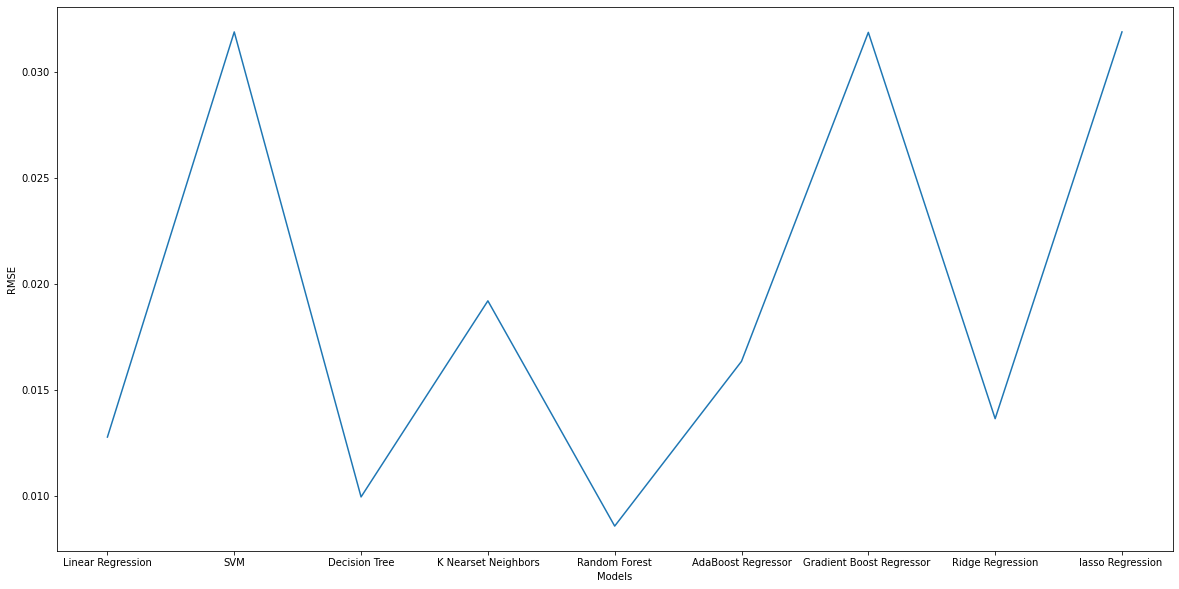

In [220]:
plt.figure(figsize=(20, 10))
plt.plot(scores.keys(),scores.values())
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

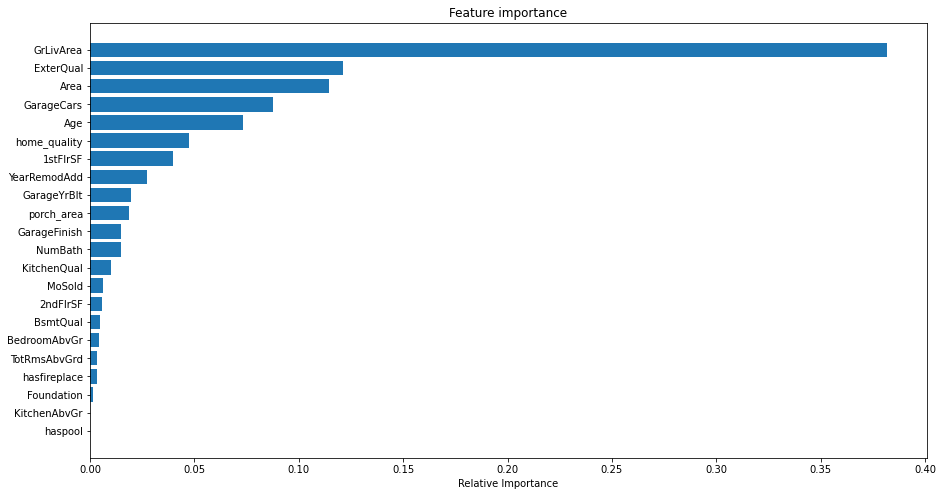

In [221]:
model=md3.best_estimator_.fit(x_test,y_test)
features=list(x_train.columns)
importance=model.feature_importances_
indeces=np.argsort(importance)
fig=plt.figure(figsize=(15,8))
plt.title('Feature importance')
plt.barh(range(len(indeces)),importance[indeces],align='center')
plt.xlabel('Relative Importance')
plt.yticks(range(len(indeces)),[features[i]for i in indeces])
plt.show()

In [222]:
# Refit model with feature improtance
importance=['NumBath','porch_area','YearRemodAdd','1stFlrSF','home_quality','Age','GarageCars','Area','ExterQual','GrLivArea']
x_train,x_test=x_train[importance],x_test[importance]
model=md3.best_estimator_.fit(x_train,y_train)

# RMSE score on training data
pred=model.predict(x_train)
rmse(y_train,pred)

# RMSE score on testing data
y_test_predecit = model.predict(x_test)
rmse(y_test,y_test_predecit)

RMSE: 0.0033295933771116996
RMSE: 0.007600029123111268


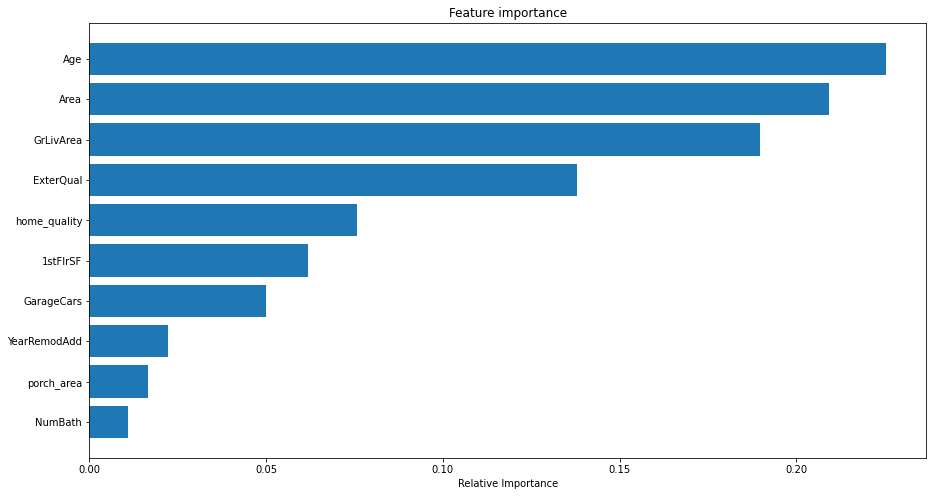

In [223]:
# Plot Feature importance
features=list(x_train.columns)
importance=model.feature_importances_
indeces=np.argsort(importance)
fig=plt.figure(figsize=(15,8))
plt.title('Feature importance')
plt.barh(range(len(indeces)),importance[indeces],align='center')
plt.xlabel('Relative Importance')
plt.yticks(range(len(indeces)),[features[i]for i in indeces])
plt.show()

In [224]:
# export best model
b=os.path.abspath('')+'\model\Random forest model.pkl'
kl=dump(fitted_model3, b)
columns = {
    'data_columns':[col.lower()for col in x_train.columns]
}
c=os.path.abspath('')+'\model\columns.json'
with open (c,'w') as f:
    f.write(json.dumps(columns))

In [225]:
x_train.apply(lambda x:x.unique())

NumBath                  [3.0, 2.5, 1.0, 1.5, 3.5, 2.0, 4.0, 4.5]
porch_area      [0.2901655306718598, 0.25024342745861733, 0.27...
YearRemodAdd    [0.7333333333333343, 0.0, 0.5, 0.3333333333333...
1stFlrSF        [0.3573295319553338, 0.1223568543597054, 0.234...
home_quality     [13, 14, 12, 11, 15, 10, 8, 9, 16, 7, 17, 6, 19]
Age             [14, 86, 29, 13, 39, 2, 46, 54, 84, 42, 15, 36...
GarageCars                                           [2, 1, 3, 4]
Area            [0.25831320824818876, 0.11536318038268623, 0.1...
ExterQual                                            [2, 3, 0, 1]
GrLivArea       [0.28641155798516205, 0.24248340491995315, 0.1...
dtype: object